In [2]:
import pandas as pd 

amzn = pd.read_csv(r'C:\AIEBA Datasets\Proj1 Datasets\AmazonReviews.csv',encoding='utf-8',engine='python')

# Drop columns that are not needed and standardize column names
amzn = amzn.filter(items=['reviews.rating', 'reviews.text'])
amzn = amzn.rename(columns={"reviews.rating":"reviews_rating", "reviews.text":"reviews_text"})

amzn = amzn.dropna()
amzn.head()

,reviews_rating,reviews_text
0,5.0,This $product so far has not%&^# disappointed....
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


2.0      402
1.0      410
3.0     1499
4.0     8541
5.0    23774
Name: reviews_rating, dtype: int64

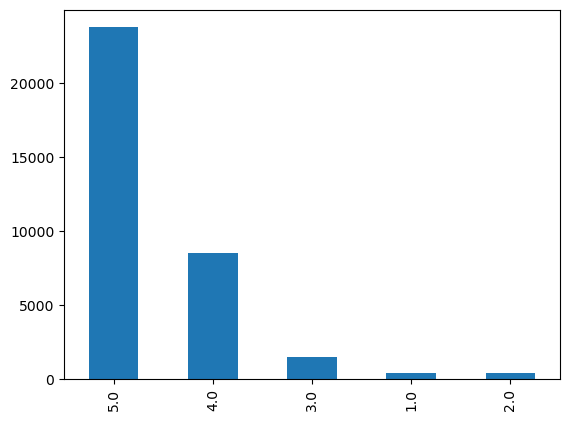

In [3]:
amzn["reviews_rating"].value_counts().plot.bar()
amzn["reviews_rating"].value_counts(ascending=True)